# U3T4_Practica1: Analisis leche mamiferos
En el archivo “mammals.csv” se encuentra una lista de mamíferos y los constituyentes de su leche. A partir de esta información, segmenta los mamíferos sobre la base de los constituyentes de la leche y obtén los valores promedios de la leche para cada grupo de animales.

In [4]:
# Preparamos el entorno
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# importamos las librerias
import pandas as pd  # Python Data Analysis Library

# Leemos el fichero
Mammals_df = pd.DataFrame.from_csv('mammals.csv', header=0, sep=',')
print(Mammals_df.head())
print(Mammals_df.describe())
print(Mammals_df.index)
print(Mammals_df.columns)
print(list(Mammals_df))
print(Mammals_df)

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib
           water  protein  fat  lactose   ash
name                                         
Horse       90.1      2.6  1.0      6.9  0.35
Orangutan   88.5      1.4  3.5      6.0  0.24
Monkey      88.4      2.2  2.7      6.4  0.18
Donkey      90.3      1.7  1.4      6.2  0.40
Hippo       90.4      0.6  4.5      4.4  0.10
           water    protein        fat   lactose        ash
count  25.000000  25.000000  25.000000  25.00000  25.000000
mean   78.184000   6.212000  10.308000   4.13200   0.829200
std    12.817913   3.652547  10.517997   1.83183   0.473787
min    44.900000   0.600000   1.000000   0.00000   0.100000
25%    71.300000   3.000000   3.400000   2.70000   0.530000
50%    82.000000   5.900000   6.300000   4.70000   0.800000
75%    87.700000   9.700000  13.100000   5.60000   0.930000
max    90.400000  12.300000  42.000000   6.90000   2.300000
Index(['Horse', 'Orangutan', 'Monkey', 'Do

In [36]:
# Obtencion de los Componentes Principales (PCA)
from sklearn.decomposition import PCA

# Lo obtenemos para todas las columnas de datos del fichero.
pca = PCA(n_components = len(Mammals_df.columns))
x_pca = pca.fit_transform(Mammals_df)
ix = 0
for columna in Mammals_df.columns:
    print('Varianza explicada por la compontente', Mammals_df.columns[ix], pca.explained_variance_ratio_[ix])
    ix = ix + 1

Varianza explicada por la compontente water 0.96677974106
Varianza explicada por la compontente protein 0.0278110551481
Varianza explicada por la compontente fat 0.00411366411334
Varianza explicada por la compontente lactose 0.00104730786496
Varianza explicada por la compontente ash 0.00024823181399


La mayor parte de la varianza la explica el componente water, de modo que podria simplificarse el modelo. De hecho con las variables water y protein se explica el 99.4% de la varianza

## Clusterizacion de los datos
Clusterizamos usando los distintos algoritmos

### K-Means

[0.6250735975612236, 0.65625017008767306, 0.6002302679964463, 0.59722703956947609, 0.61017817678730768, 0.55225753899671615, 0.4481528408673604, 0.42310440377202524, 0.36758667685153368, 0.33250185082464667, 0.32593211734719879, 0.32339859556947514, 0.29249460427064122]


Text(0.5,1,'Mammals')

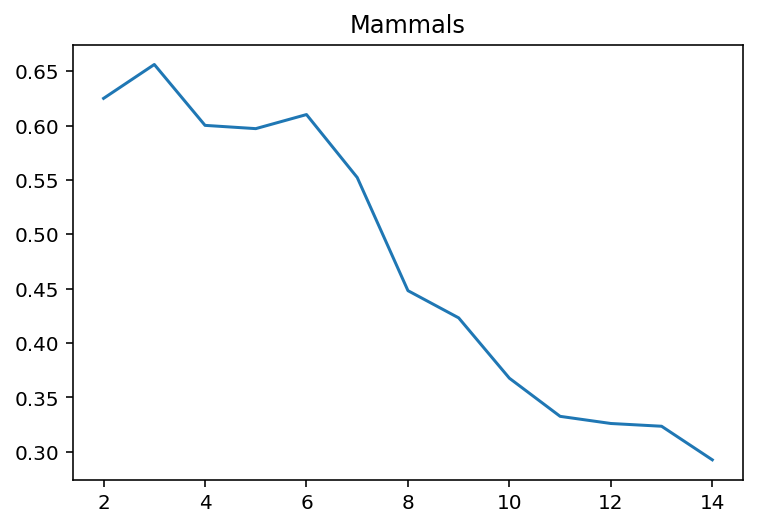

In [45]:
# En primer lugar es necesario buscar el numero de clusteres
# Usamos el metodo de la Silhouette: Buscamos el valor maximo de las distancias aplicando iterativamente K-Means
# para tener el numero de clusteres optimo
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

Silhouette_Mammals_dist =[]
Max_Clusters = 15

for numClus in range(2, Max_Clusters):
    kmean = KMeans(n_clusters = numClus, random_state = 1).fit(Mammals_df)
    Silhouette_Mammals_dist.append(silhouette_score(Mammals_df, kmean.labels_))

print(Silhouette_Mammals_dist)
plot(range(2, Max_Clusters), Silhouette_Mammals_dist)
title('Mammals')

Se observa que el maximo esta en 3 clusteres. Obtenemos el K-Means con 3 clusteres

,water,protein
name,,
Horse,90.1,2.6
Orangutan,88.5,1.4
Monkey,88.4,2.2
Donkey,90.3,1.7
Hippo,90.4,0.6
Camel,87.7,3.5
Bison,86.9,4.8
Buffalo,82.1,5.9
Guinea Pig,81.9,7.4


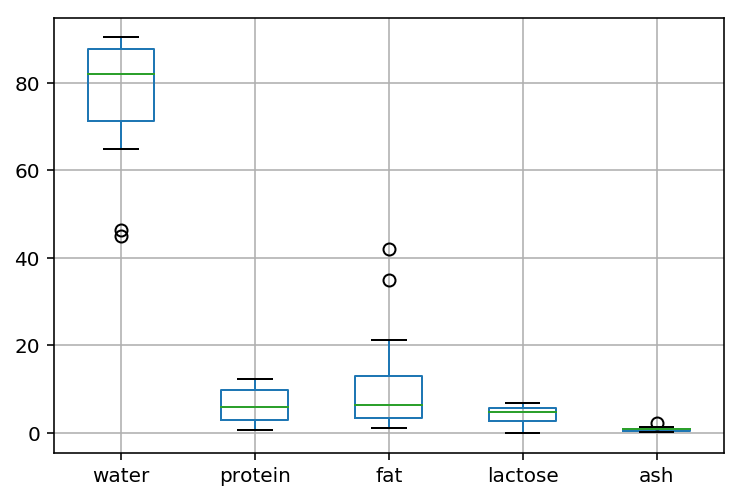

In [101]:
Mammals_df.boxplot()
Mammals_df.filter(items=['water','protein'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 2]
Cluster 0
Index(['Horse', 'Orangutan', 'Monkey', 'Donkey', 'Hippo', 'Camel', 'Bison',
       'Buffalo', 'Guinea Pig', 'Cat', 'Fox', 'Llama', 'Mule', 'Pig', 'Zebra',
       'Sheep'],
      dtype='object', name='name')
Cluster 1
Index(['Dog', 'Elephant', 'Rabbit', 'Rat', 'Deer', 'Reindeer', 'Whale'], dtype='object', name='name')
Cluster 2
Index(['Seal', 'Dolphin'], dtype='object', name='name')
[[ 90.1    2.6    1.     6.9    0.35]
 [ 88.5    1.4    3.5    6.     0.24]
 [ 88.4    2.2    2.7    6.4    0.18]
 [ 90.3    1.7    1.4    6.2    0.4 ]
 [ 90.4    0.6    4.5    4.4    0.1 ]
 [ 87.7    3.5    3.4    4.8    0.71]
 [ 86.9    4.8    1.7    5.7    0.9 ]
 [ 82.1    5.9    7.9    4.7    0.78]
 [ 81.9    7.4    7.2    2.7    0.85]
 [ 81.6   10.1    6.3    4.4    0.75]
 [ 81.6    6.6    5.9    4.9    0.93]
 [ 86.5    3.9    3.2    5.6    0.8 ]
 [ 90.     2.     1.8    5.5    0.47]
 [ 82.8    7.1    5.1    3.7    1.1 ]
 [ 86.2    3.     4.8

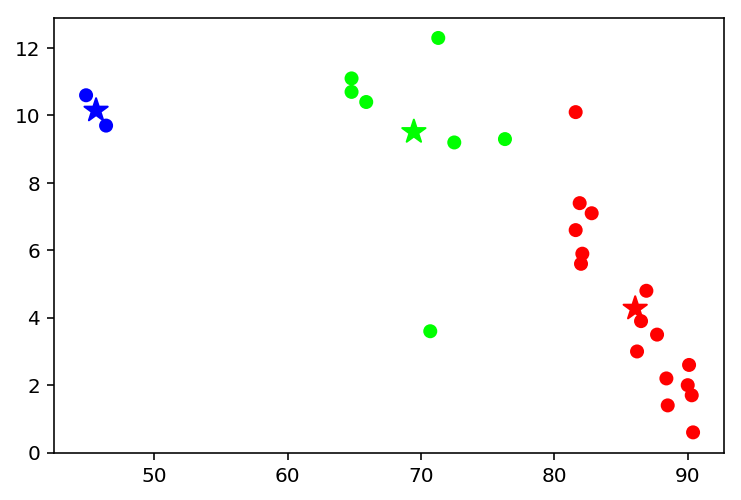

In [49]:
# Ejecutamos la clusterizacion y graficamos
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

# Clusterizacion
# NOTA: Se podria buscar de forma automatica el indice con maximo de indice Silhouette
Kmean_Mammals = KMeans(n_clusters = 3, random_state = 1).fit(Mammals_df)
Kmean_MammalsClusters = Kmean_Mammals.predict(Mammals_df)
print(Kmean_MammalsClusters)

for i in range(0, max(Kmean_MammalsClusters) + 1):
    print ("Cluster", i)
    print (Mammals_df.index[Kmean_MammalsClusters == i])

#Graficamos los clusteres y sus centros
# Dibujamos los elementos de cada cluster
# Es necesario transformarlo en array para poder trabajar con scatter:
X = np.asarray(Mammals_df)
print(X)
mapa_color = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
scatter(X[:, 0], X[:, 1],c=Kmean_MammalsClusters, cmap = mapa_color)

# Centros
print(Kmean_Mammals.cluster_centers_)
scatter(Kmean_Mammals.cluster_centers_[:, 0], Kmean_Mammals.cluster_centers_[:, 1], 
        c=[0,1,2], cmap = mapa_color, marker='*', s= 150)